# Analysis on Fuel Economy Data provided by EPA

The [Link](https://video.udacity-data.com/topher/2018/October/5bc6498d_fuel-economy-datasets/fuel-economy-datasets.zip) to download the dataset.

Also, find the [pdf Link](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to understand the data before analyzing it.

In [359]:
#import the data for both 2008 and 2018

import pandas as pd

df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [360]:
#lets assess our dataframes
#2008 dataset 
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [361]:
#2018 dataset
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [362]:
#checking for duplicates 
#2008 dataset by summing how many duplicates we have
sum(df_08.duplicated())

25

In [363]:
#2018 dataset by summing how many duplicates we have
sum(df_18.duplicated())

0

In [364]:
#next check for nulls in both datasets
#we sum nulls appearing in 2008 dataset
df_08.isna().any(axis = 1).sum()

199

In [365]:
#we sum nulls appearing in 2008 dataset
df_18.isna().any(axis = 1).sum()

2

In [366]:
#checking for unique items in every column
#2008 dataset
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [367]:
#2018 dataset unique items in every column
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [368]:
#we check and drop some column that we do not need
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [369]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

In [370]:
#Assess the data using 5 top rows 
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [371]:
df_08.drop(['Stnd', 'Underhood ID','FE Calc Appr','Unadj Cmb MPG'], axis = 1, inplace = True )

In [372]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [373]:
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID','Comb CO2'], axis = 1, inplace= True)

In [374]:
#confirm the column we dropped
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [375]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [376]:
# we stadardize the column names so 2008 has Sales Area and 2018 has Cert Region
#we rename coumn in 2008 dataset to Cert region
df_08.rename(columns = {'Sales Area' : 'Cert Region'}, inplace= True)

In [377]:
#confirm the renaming on 2008 data 
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [378]:
#Python works well with columns names separatedd using _ instead of spaces
#converting all column names into lower case and replace " " with _
#2008 dataset
df_08.rename(columns = lambda x : x.strip().lower().replace(" ", "_"), inplace= True)

In [379]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [380]:
#2018 dataset
df_18.rename(columns = lambda x : x.strip().lower().replace(" ", "_"), inplace= True)

In [381]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [382]:
#we confirm if columns in 2008 and 2018 dataset are identical 
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Compare cars only within the same geographical location

### In this case, let check where cert region is California abbreviated as CA in column cert_region

In [383]:
#Filter datasets to only include CA cert_region
df_08.query('cert_region == "CA"', inplace = True)

In [384]:
#confirm if we have only cert_region is equal to CA
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [385]:
#we drop column cert_region
df_08.drop(['cert_region'], axis = 1, inplace = True)
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [386]:
# lets repat the process for 2018 dataset
df_18.query('cert_region == "CA"', inplace= True)
df_18.drop(['cert_region'], axis = 1, inplace= True)
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [387]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 2400
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1084 non-null   object 
 1   displ                 1084 non-null   float64
 2   cyl                   1009 non-null   object 
 3   trans                 1009 non-null   object 
 4   drive                 1047 non-null   object 
 5   fuel                  1084 non-null   object 
 6   veh_class             1084 non-null   object 
 7   air_pollution_score   1084 non-null   object 
 8   city_mpg              1009 non-null   object 
 9   hwy_mpg               1009 non-null   object 
 10  cmb_mpg               1009 non-null   object 
 11  greenhouse_gas_score  1009 non-null   object 
 12  smartway              1084 non-null   object 
dtypes: float64(1), object(12)
memory usage: 118.6+ KB


In [388]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 798 non-null    object 
 1   displ                 797 non-null    float64
 2   cyl                   797 non-null    float64
 3   trans                 798 non-null    object 
 4   drive                 798 non-null    object 
 5   fuel                  798 non-null    object 
 6   veh_class             798 non-null    object 
 7   air_pollution_score   798 non-null    int64  
 8   city_mpg              798 non-null    object 
 9   hwy_mpg               798 non-null    object 
 10  cmb_mpg               798 non-null    object 
 11  greenhouse_gas_score  798 non-null    int64  
 12  smartway              798 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 87.3+ KB


In [389]:
#Earlier on we found some nulls on both datasets
#Lets confirm again the nulls we have
df_08.isna().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [390]:
df_18.isna().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [391]:
#we drop the nulls
df_08.dropna(axis = 0,inplace = True)
df_18.dropna(axis = 0, inplace= True)

In [392]:
df_08.isna().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [393]:
df_08.shape

(1009, 13)

In [394]:
df_08.isna().sum().any()

False

In [395]:
# we check for duplicates and drop them
df_08.duplicated().sum()
df_18.duplicated().sum()

3

In [396]:
df_08.drop_duplicates(inplace= True)
df_18.drop_duplicates(inplace= True)

In [397]:
#confirm no duplicates in both datasets
df_08.duplicated().sum() == df_18.duplicated().sum()

True

## We confirmed the datasets have different columns type

### we standardize both datasets

In [398]:
#checking the dtypes for 2008 columns
dcolumns = df_08.columns

for column in dcolumns:
    print(column  +": "+ str(type(df_08[column][0])))

model: <class 'str'>
displ: <class 'numpy.float64'>
cyl: <class 'str'>
trans: <class 'str'>
drive: <class 'str'>
fuel: <class 'str'>
veh_class: <class 'str'>
air_pollution_score: <class 'str'>
city_mpg: <class 'str'>
hwy_mpg: <class 'str'>
cmb_mpg: <class 'str'>
greenhouse_gas_score: <class 'str'>
smartway: <class 'str'>


In [399]:
#checking the dtypes for 2018 columns
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [400]:
#investigate some records on the dataset
df_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,VOLVO V70,3.2,(6 cyl),Auto-S6,2WD,Gasoline,station wagon,7,16,24,19,5,no
2396,VOLVO XC 70,3.2,(6 cyl),Auto-S6,4WD,Gasoline,SUV,7,15,22,17,4,no
2398,VOLVO XC 90,3.2,(6 cyl),Auto-S6,2WD,Gasoline,SUV,7,14,20,16,4,no
2399,VOLVO XC 90,3.2,(6 cyl),Auto-S6,4WD,Gasoline,SUV,7,14,20,16,4,no


In [401]:
df_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,VOLVO XC 60,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,small SUV,7,26/60,28/58,26/59,10,Elite
1603,VOLVO XC 90,2.0,4.0,SemiAuto-8,2WD,Gasoline,standard SUV,5,22,29,25,5,No
1605,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,22,28,24,5,No
1607,VOLVO XC 90,2.0,4.0,SemiAuto-8,4WD,Gasoline,standard SUV,5,20,27,23,5,No


In [402]:
#column cyl on both dataset have different column type and also 2008 datasets includes symbols and str
#we convert column syul to str type, extract the integers and convert the column to an int type
df_08['cyl']  = df_08['cyl'].str.extract('(\d+)').astype(int)

In [403]:
df_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,VOLVO V70,3.2,6,Auto-S6,2WD,Gasoline,station wagon,7,16,24,19,5,no
2396,VOLVO XC 70,3.2,6,Auto-S6,4WD,Gasoline,SUV,7,15,22,17,4,no
2398,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7,14,20,16,4,no
2399,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7,14,20,16,4,no


In [404]:
#we standardize cyl column in both dataset by converting column cyl on 2018 dataset into an int
df_18['cyl'] = df_18['cyl'].astype(int)

In [405]:
# in 2008 dataset, column air_pollution_score is stored as str we convert it to an float and 2018 from int to a float
#uncomment line below to investigate

#df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

we get an error column air_pollution_score has a value 6/4

From the [Documentation](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore),

"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."


In [406]:
#first lets investigate the value in 2008 dataset
df_08_hybrid = df_08[df_08['air_pollution_score'].str.contains('/')]

df_08_hybrid

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [407]:
#first lets investigate the value
df_18_hybrid = df_18[df_18['fuel'].str.contains('/')]

df_18_hybrid

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [408]:
#create copies for the hybrid  2008 data containing /
df1 = df_08_hybrid.copy()
df2 = df_08_hybrid.copy()

df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [409]:
#In this case, we split the column containing / on the subset of dataframe creating earlier
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for i in split_columns:
    df1[i] = df1[i].apply(lambda x : x.split('/')[0])
    df2[i] = df2[i].apply(lambda x : x.split('/')[1])
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [410]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [411]:
#we have 2 rows we append them to a new df
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [412]:
#Remember on out main dataset we still have the record containg 6/4, so we drop it before appending the 2 newly created rows
df_08.drop(df_08_hybrid.index, inplace = True)


In [413]:
# Then append the 2 rows and ignore index considering we have 2 records with the same index 
df_08 = df_08.append(new_rows, ignore_index= True)

In [414]:
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


## Now that we already checked 2018 dataset and the same as above is repeated

We perform similar steps:

1. create 2 copies of the dataset containg / in fuel column
2. split the column in that the leading item on the / after split create a row and the second item after slash creates another row
3. Next, drop the indexeds on our main dataset containg the /
4. Then append newly created createdd rows ignoring the index



In [415]:
#create copies of the hyrid 2018 dataset
df1 = df_18_hybrid.copy()
df2 = df_18_hybrid.copy()

df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [416]:
#split the values in columns 'fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg'

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for i in split_columns:
    df1[i] = df1[i].apply(lambda x : x.split('/')[0])
    df2[i] = df2[i].apply(lambda x : x.split('/')[1])
    
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [417]:
# we append df1 to df2 and assign them to a new dataframe
new_rows = df1.append(df2)

new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
1517,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
1577,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [418]:
#we drop the rows on our main dataset containing /
df_18.drop(df_18_hybrid.index, inplace= True)

In [419]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [420]:
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [421]:
#we append the newly created rows into our main dataset ingoring the index
df_18 = df_18.append(new_rows, ignore_index= True)

In [422]:
df_18.shape

(832, 13)

In [423]:
df_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
828,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
829,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


# Finally we can convert air_pollution _score from type str to float in 2008 & from int to float in 2018

In [424]:
# convert air_pollution _score from type int to float in 2018
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [425]:
# convert air_pollution _score from type str to float in 2008
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

In [426]:
#Confirm the changes
df_08['air_pollution_score'].dtypes == df_18['air_pollution_score'].dtypes

True

# Next, we convert city_mpg, hwy_mpg, cmb_mpg datatypes from str to float

In [427]:
#we assign the columns to a list and use for loop to change type in all columns

mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for i in mpg_columns:
    df_08[i] = df_08[i].astype(float)
    df_18[i] = df_08[i].astype(float)
    print(df_08[i].dtypes)

float64
float64
float64


In [428]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [429]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [430]:
type(df_08['greenhouse_gas_score'][0])

str

In [431]:
#we can see we have one more column to fix, column greenhouse_gas_score
# in 2008 dataset we convert greenhouse_gas_score from str to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int64')

In [432]:
df_08['greenhouse_gas_score'].dtypes == df_18['greenhouse_gas_score'].dtypes

True

In [433]:
# we can confirmif all the datatype are equivalent
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# Our next step is exploring the 2 datasets by visualizing 

## Coming soon........

We will use histogram and scatter_matrix to check the distribution of the datapoints

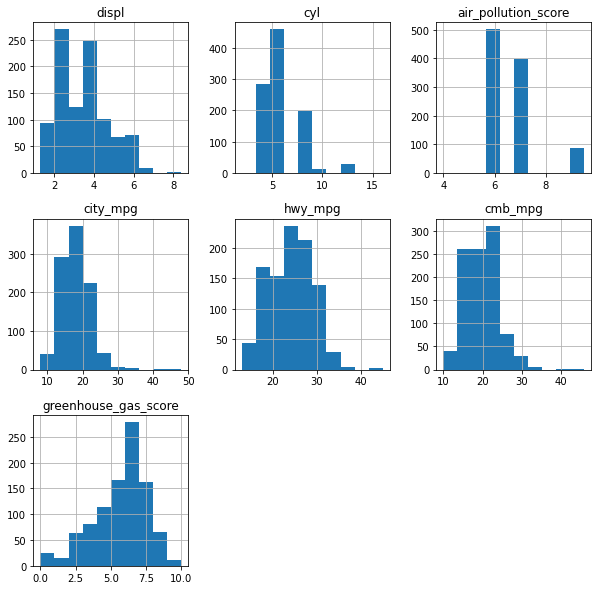

In [434]:
#2008 dataset distribution
df_08.hist(figsize = (10,10));

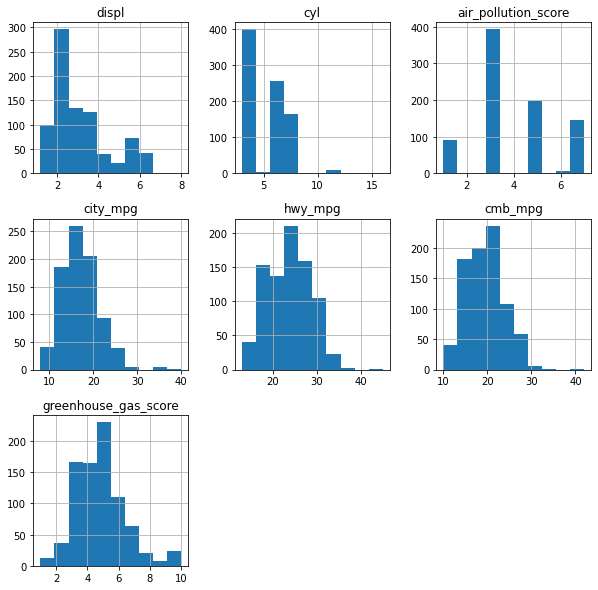

In [435]:
#2018 dataset distributions
df_18.hist(figsize = (10,10));

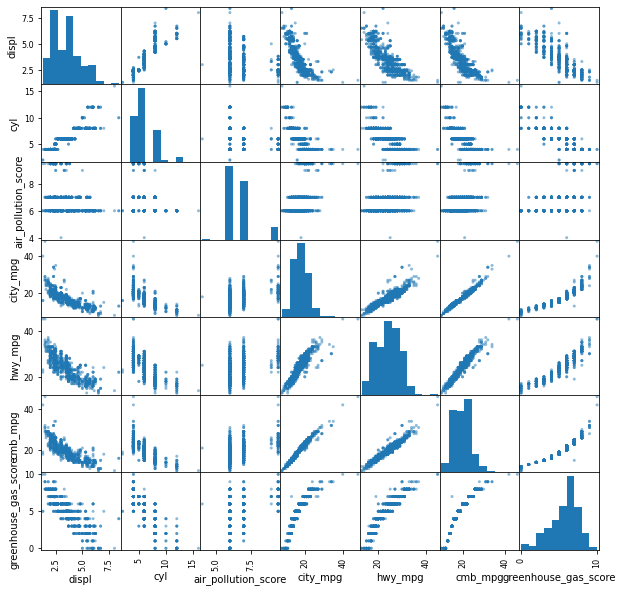

In [436]:
#scatter_matrix for 2008 dataset
pd.plotting.scatter_matrix(df_08, figsize = (10, 10));

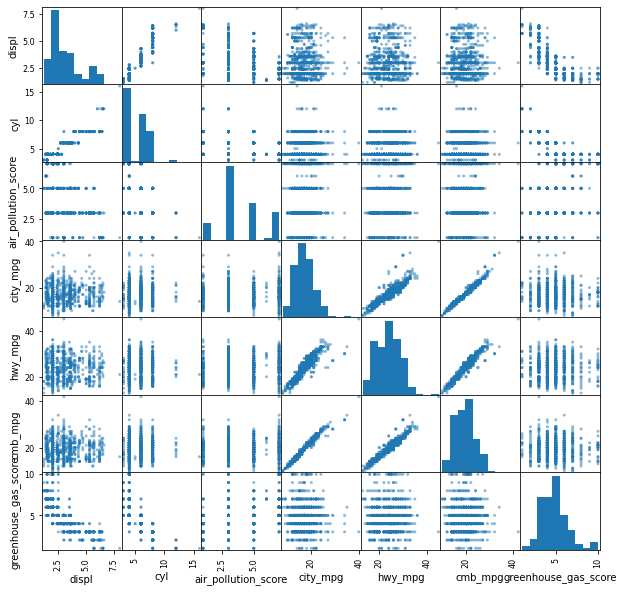

In [437]:
#scatter matrix for 2018 dataset 
pd.plotting.scatter_matrix(df_18, figsize = (10,10));

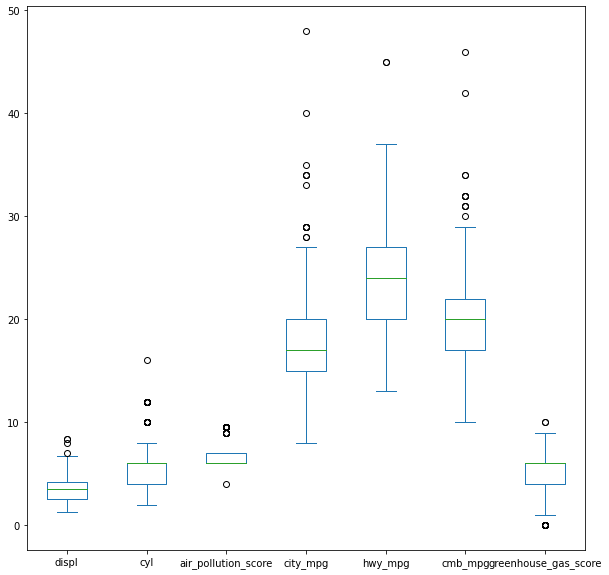

In [438]:
#checking for outliers in 2008 dataset
df_08.plot(kind = 'box', figsize= (10,10));

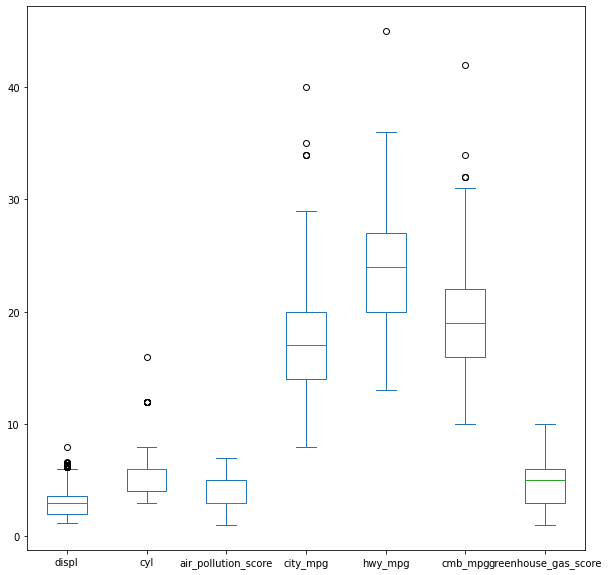

In [439]:
#checking for outliers in 2018 dataset
df_18.plot(kind = 'box', figsize= (10,10));

### Some Comparison on 2008 & 2018

For instance:
1. In 2008 greenhouse gas score is skewed to the left as compared to 2018 greeenhouse gas score which is skewed more to the right.
2. Combined mpg from 2008 beccome more skewed to the right in 2018
3. checking at the correlation between displacement and combined mpg in both datasets, we see a negative correlation nbetween the 2 features
4. On the other hand if we check the correlation between greenhouse gas score and combined mpg, we see a positive correlation

More can be deduced from the above visuals

## We answer some few Question from the datasets

- Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
- How much have vehicle classes improved in fuel economy (increased in mpg)?
- What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
- What features are associated with better fuel economy (mpg)?

### Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

- Alternative fuels include gaseous fuels such as hydrogen, natural gas, Compressed natural gas, and propane; alcohols such as ethanol, methanol, and butanol; vegetable and waste-derived oils; and electricity. 
- Check this [Link](https://www.epa.gov/renewable-fuel-standard-program/alternative-fuels#:~:text=Alternative%20fuels%20include%20gaseous%20fuels,%2Dderived%20oils%3B%20and%20electricity.) for moere explanation.

In [440]:
# In 2008 we check the unique fuels and how many per fuel type
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [441]:
# In 2008 we check the unique fuels and how many per fuel type
df_18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

- From the above, 2008 has CNG and ethanol as alternative fuels
- 2018 has Ethanol and electricity as the alternative fuels

In [442]:
# get the count of unique model using alternative fuels in 2008 and 2018 

df_alt08 = df_08.query('fuel in ["CNG", "ethanol"]')['model'].nunique() 
df_alt08

2

In [443]:
df_alt18 = df_18.query('fuel in ["Electricity", "Ethanol"]')['model'].nunique() 
df_alt18

26

In [444]:
#we plot the values in bar chart
df_nmodels = [df_alt08, df_alt18]
year = ['2008', '2018']

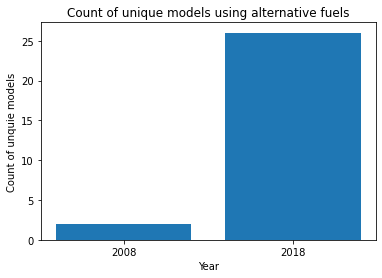

In [445]:
# lets use matplotlib to visuliaze 
import matplotlib.pyplot as plt 

plt.bar( year,  df_nmodels)
plt.xlabel('Year')
plt.ylabel('Count of unquie models')
plt.title('Count of unique models using alternative fuels')

plt.show();

### How much have vehicle classes improved in fuel economy (increased in mpg)?

In [446]:
# inspect naming of column of vehicle class
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [447]:
#get the mean combined miles per gallons fuels consumption per vehicle class in 2008
df_veh08 = df_08.groupby('veh_class')['cmb_mpg'].mean()
df_veh08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [448]:
#get the mean combined miles per gallons fuels consumption per vehicle class in 2018
df_veh18 = df_18.groupby('veh_class')['cmb_mpg'].mean()
df_veh18

veh_class
large car          18.397727
midsize car        19.942029
minivan            18.000000
pickup             18.602564
small SUV          19.777778
small car          19.624561
special purpose    19.800000
standard SUV       19.581395
station wagon      19.205882
Name: cmb_mpg, dtype: float64

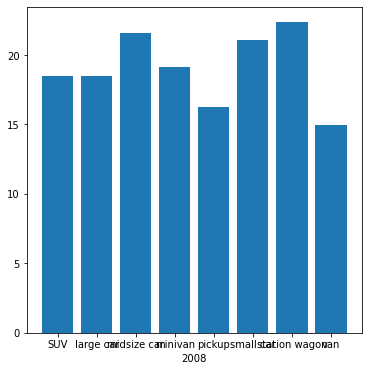

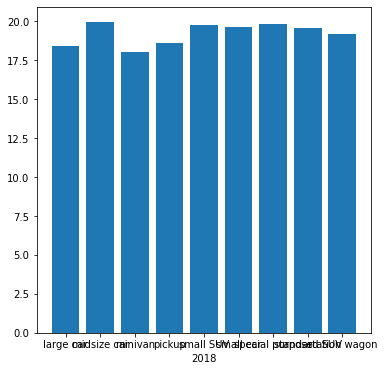

In [449]:
plt.subplots(figsize = (6,6))
plt.bar(df_veh08.index, df_veh08)
plt.xlabel('2008')

plt.subplots(figsize = (6,6))
plt.bar(df_veh18.index, df_veh18)
plt.xlabel('2018')

plt.show();

In [450]:
#get the diffrence in mean fuel consumption between 2008 and 2018
df_diff = df_veh18 - df_veh08
df_diff

veh_class
SUV                     NaN
large car         -0.111364
midsize car       -1.659420
minivan           -1.117647
pickup             2.325456
small SUV               NaN
small car         -1.480544
special purpose         NaN
standard SUV            NaN
station wagon     -3.160784
van                     NaN
Name: cmb_mpg, dtype: float64

In [451]:
# replace Nan with 0 
import numpy as np

df_diff = df_diff.replace(np.nan, 0)
df_diff

veh_class
SUV                0.000000
large car         -0.111364
midsize car       -1.659420
minivan           -1.117647
pickup             2.325456
small SUV          0.000000
small car         -1.480544
special purpose    0.000000
standard SUV       0.000000
station wagon     -3.160784
van                0.000000
Name: cmb_mpg, dtype: float64

Text(0, 0.5, 'Diference in fuel consumption')

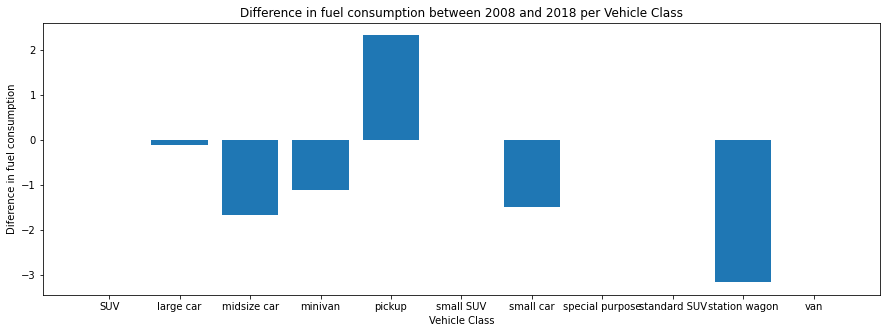

In [452]:
# we visualize the difference 
plt.subplots(figsize = (15,5))
plt.bar( df_diff.index,df_diff)
plt.title('Difference in fuel consumption between 2008 and 2018 per Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Diference in fuel consumption')

### What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)

In [453]:
#we get the unique smartway in each dataset
df_08.groupby('smartway')['smartway'].count()

smartway
no     607
yes    380
Name: smartway, dtype: int64

In [454]:
df_18.groupby('smartway')['smartway'].count()

smartway
Elite     17
No       724
Yes       91
Name: smartway, dtype: int64

In [455]:
#creating dataframe excluding smartway is equal to NO
df_sw08 = df_08.query('smartway in ["yes"]')
df_sw08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [456]:
df_sw18 = df_18.query('smartway in ["Yes", "Eliet"]')
df_sw18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,22.0,29.0,25.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,23.0,31.0,25.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,20.0,30.0,24.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,21.0,30.0,24.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,22.0,30.0,25.0,7,Yes


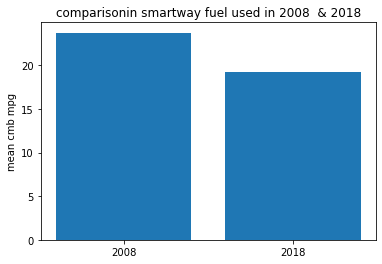

In [457]:
mean_cmb08 = df_sw08['cmb_mpg'].mean()
mean_cmb18 = df_sw18['cmb_mpg'].mean()
mean_cmb = [mean_cmb08, mean_cmb18]
xvalues = ["2008", "2018"]

plt.bar(xvalues,mean_cmb)
plt.title('comparisonin smartway fuel used in 2008  & 2018')
plt.ylabel('mean cmb mpg');

In [458]:
#In general we can compare the statistical info between vehicles in smartway in 2008 and 2018
df_sw08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [459]:
df_sw18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.753846,3.923077,4.879121,16.692308,23.406593,19.208791,7.538462
std,0.420399,0.452911,1.769087,3.999145,5.174678,4.347455,0.860332
min,1.200000,3.000000,3.000000,8.000000,13.000000,10.000000,7.000000
25%,1.500000,4.000000,3.000000,14.000000,19.500000,16.000000,7.000000
50%,1.600000,4.000000,5.000000,16.000000,24.000000,19.000000,7.000000
75%,2.000000,4.000000,7.000000,20.000000,27.000000,23.000000,8.000000
max,3.500000,6.000000,7.000000,25.000000,35.000000,29.000000,10.000000


###  What features are associated with better fuel economy (mpg)?

In [460]:
# we are going to query records on vehicles whose combined fuel(mpg) is greater than mean cmb_mpg
df_features = df_08.query('cmb_mpg > cmb_mpg.mean()')
df_features.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
6,ACURA TSX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,19.0,28.0,22.0,6,no
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes


In [461]:
df_features18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
df_features18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,18.0,26.0,21.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,17.0,26.0,20.0,5,No
5,ACURA TLX AWD A-SPEC,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,18.0,27.0,21.0,5,No
6,ACURA TLX FWD A-SPEC,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,19.0,28.0,22.0,5,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,20.0,28.0,23.0,6,No


In [462]:
df_features.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [463]:
df_features18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,3.108068,5.572127,4.068460,20.190709,27.437653,22.841076,4.757946
std,1.318592,1.686249,1.872193,3.021623,3.044064,2.791211,1.793942
min,1.400000,3.000000,1.000000,17.000000,20.000000,20.000000,1.000000
25%,2.000000,4.000000,3.000000,18.000000,25.000000,21.000000,3.000000
50%,3.000000,6.000000,3.000000,20.000000,27.000000,22.000000,5.000000
75%,3.600000,6.000000,5.000000,21.000000,30.000000,24.000000,6.000000
max,6.600000,12.000000,7.000000,40.000000,45.000000,42.000000,10.000000
